## About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# Basic Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("F:/Programming/Project/Yulu Case Study/bike_sharing.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Column Profiling:

In [12]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [13]:
df['holiday'].unique()

array([0, 1], dtype=int64)

In [14]:
df['workingday'].unique()

array([0, 1], dtype=int64)

In [15]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

In [16]:
df['datetime'] = pd.to_datetime(df['datetime'])

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Changing Columns to Categories

In [19]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['weather']=df['weather'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow / Rain', 4: 'Heavy Rain'})
df['holiday']=df['holiday'].map({1: 'Yes', 0: 'No'})
df['workingday']=df['workingday'].map({1: 'Yes', 0: 'No'})

In [12]:
df['workingday'].value_counts()

Yes    7412
No     3474
Name: workingday, dtype: int64

In [13]:
df['holiday'].value_counts()

No     10575
Yes      311
Name: holiday, dtype: int64

In [14]:
df['weather'].value_counts()

Clear                7192
Mist                 2834
Light Snow / Rain     859
Heavy Rain              1
Name: weather, dtype: int64

In [20]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,No,No,Clear,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,No,No,Clear,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,No,No,Clear,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,No,No,Clear,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,No,No,Clear,9.84,14.395,75,0.0,0,1,1


In [15]:
df['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [ ]:
df.head()

### Checking For Null Values

In [16]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Univariate Analysis

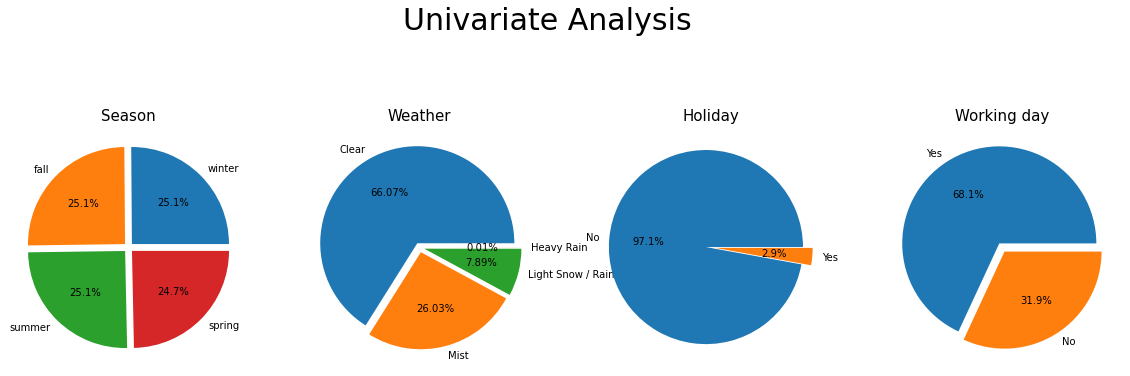

In [17]:
plt.figure(figsize=(20,7)).suptitle("Univariate Analysis", fontsize=30)

plt.subplot(1,4,1)
plt.pie(df['season'].value_counts(), explode=(.05,.05,.05,.05), labels=df['season'].value_counts().index, autopct='%1.1f%%')
plt.title("Season", fontsize=15)

plt.subplot(1,4,2)
plt.pie(df['weather'].value_counts(), explode=(.05,.05,.05,.05), labels=df['weather'].value_counts().index, autopct='%1.2f%%')
plt.title("Weather", fontsize=15)

plt.subplot(1,4,3)
plt.pie(df['holiday'].value_counts(), explode=(.05,.05), labels=df['holiday'].value_counts().index, autopct='%1.1f%%')
plt.title("Holiday", fontsize=15)

plt.subplot(1,4,4)
plt.pie(df['workingday'].value_counts(), explode=(.05,.05), labels=df['workingday'].value_counts().index, autopct='%1.1f%%')
plt.title("Working day", fontsize=15)
plt.show()


### The pie charts provide insights into different categories:
1. **Season Distribution**:
    - The data is evenly distributed across all four seasons: spring, summer, fall, and winter.
    - Each season represents approximately 25% of the dataset.
    - This balance ensures that seasonal variations are well-represented.

2. **Weather Conditions**:
    - Clear weather dominates, accounting for 66.07% of the data.
    - Mist follows at 26.03%, while heavy rain or light snow/rain occurrences are rare.
    - The dataset primarily captures clear weather conditions.

3. **Holiday vs. Non-Holiday**:
    - A significant majority (97.1%) of the data points are from non-holiday days.
    - Public holidays are underrepresented, making the dataset predominantly composed of regular working days or weekends.

4. **Working Days**:
    - Working days (68.1%) dominate over non-working days (31.9%).
    - The dataset reflects weekdays more than weekends.

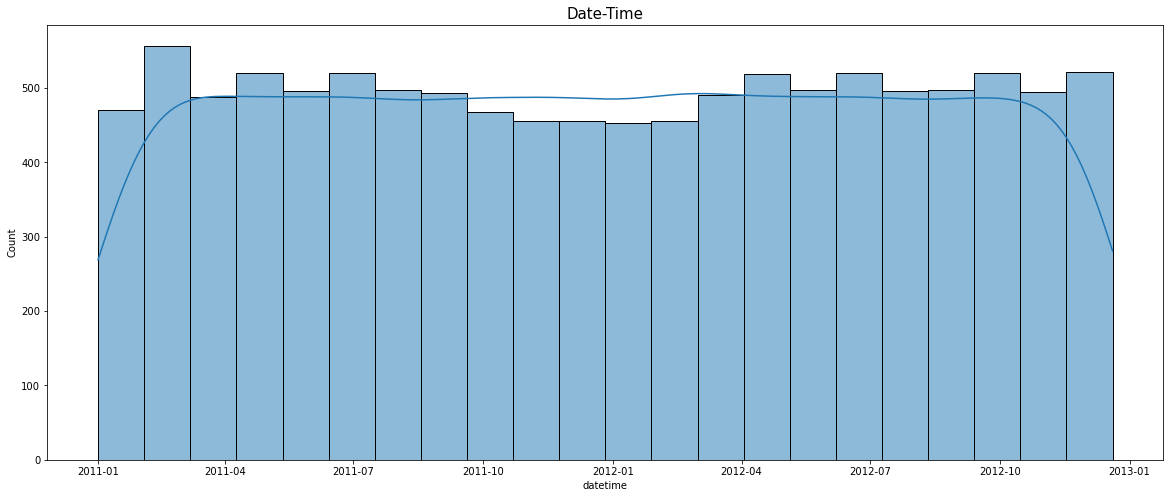

In [18]:
plt.figure(figsize=(20,8))
sns.histplot(df['datetime'], kde=True)
plt.title("Date-Time", fontsize=15)
plt.show()

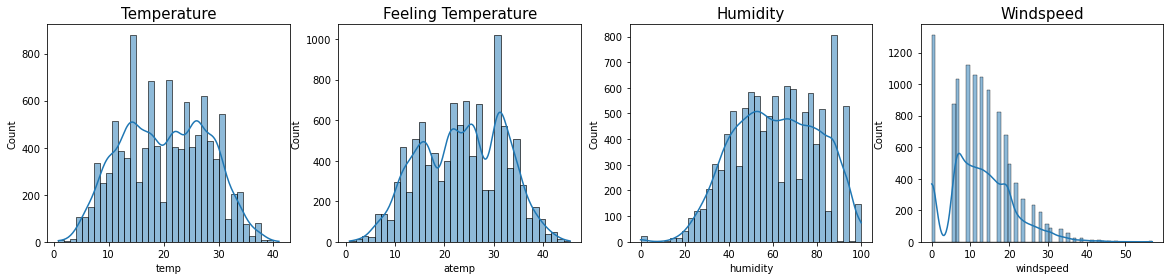

In [19]:
plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
sns.histplot(df['temp'], kde=True)
plt.title("Temperature", fontsize=15)

plt.subplot(1,4,2)
sns.histplot(df['atemp'], kde=True)
plt.title("Feeling Temperature", fontsize=15)

plt.subplot(1,4,3)
sns.histplot(df['humidity'], kde=True)
plt.title("Humidity", fontsize=15)

plt.subplot(1,4,4)
sns.histplot(df['windspeed'], kde=True)
plt.title("Windspeed", fontsize=15)

plt.show()

### histograms provides valuable insights into different weather parameters:

1. **Temperature Distribution**:
    - The temperature data exhibits a bell-shaped curve, centered around 20-30 degrees Celsius.
    - Extreme temperatures are rare, indicating a predominance of moderate temperature conditions.

2. **Feeling Temperature Distribution**:
    - Similar to actual temperature, the feeling temperature distribution is also bell-shaped, with a peak in the 20-30 degree range.
    - People's perception of temperature closely mirrors the actual measurements.

3. **Humidity Distribution**:
    - The histogram suggests a prevalence of moderate to high humidity levels, with a notable spike around 60-80%.
    - Extremely low humidity days are infrequent, reflecting typical humidity conditions in the dataset.

4. **Windspeed Distribution**:
    - Windspeed data skews to the right, indicating a higher frequency of lower windspeeds.
    - Extreme wind conditions are uncommon, with the dataset mainly comprising calm to gentle breezes.

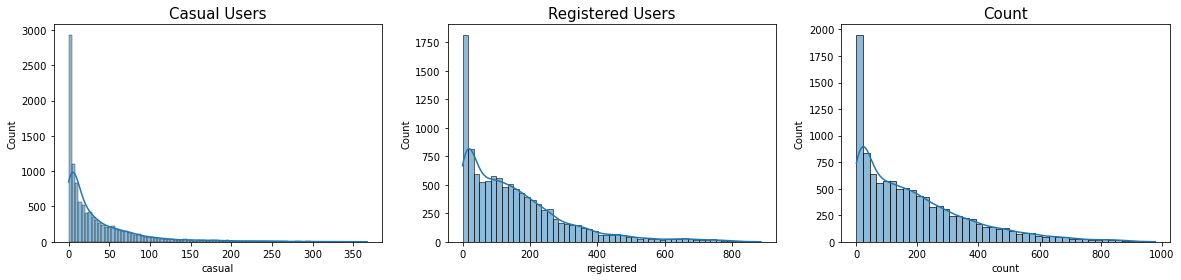

In [20]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
sns.histplot(df['casual'], kde=True)
plt.title("Casual Users", fontsize=15)

plt.subplot(1,3,2)
sns.histplot(df['registered'], kde=True)
plt.title("Registered Users", fontsize=15)

plt.subplot(1,3,3)
sns.histplot(df['count'], kde=True)
plt.title("Count", fontsize=15)

plt.show()

### The bar plots reveals interesting patterns related to user counts:

1. **Usage Patterns**:
    - Casual users predominantly exhibit low counts, with approximately 70% below 500. In contrast, registered users show a more balanced distribution across count categories, with around 50% below 500.
  
2. **Total Engagement**:
    - Overall, the distribution peaks at lower counts for both user types, with approximately 60% of total users below 500 counts.

3. **User Disparity**:
    - Casual users outnumber registered users across all count ranges, with a ratio of approximately 2:1. This suggests a higher prevalence of casual users on the platform.

4. **Engagement Strategy**:
    - To enhance user engagement, focus on incentivizing registration and encouraging more consistent usage among both casual and registered users.

## Bi-Variate Analysis:

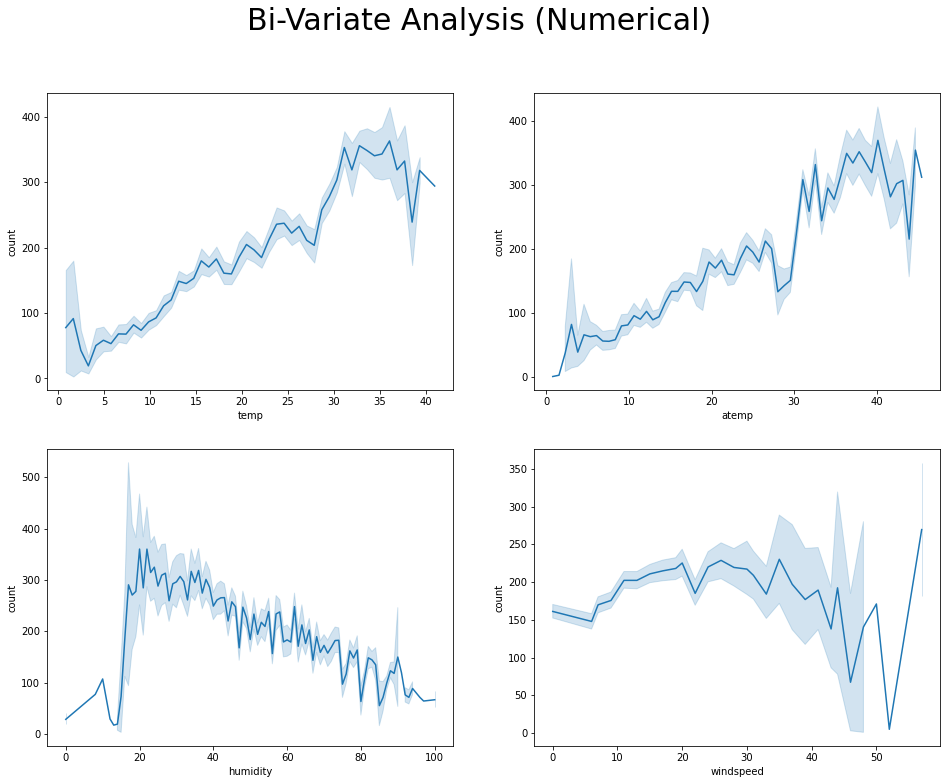

In [21]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
cat_cols= ['season', 'holiday', 'workingday', 'weather']


fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
plt.suptitle("Bi-Variate Analysis (Numerical)", fontsize=30)

index = 0
for row in range(2):
    for col in range(2):
        sns.lineplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

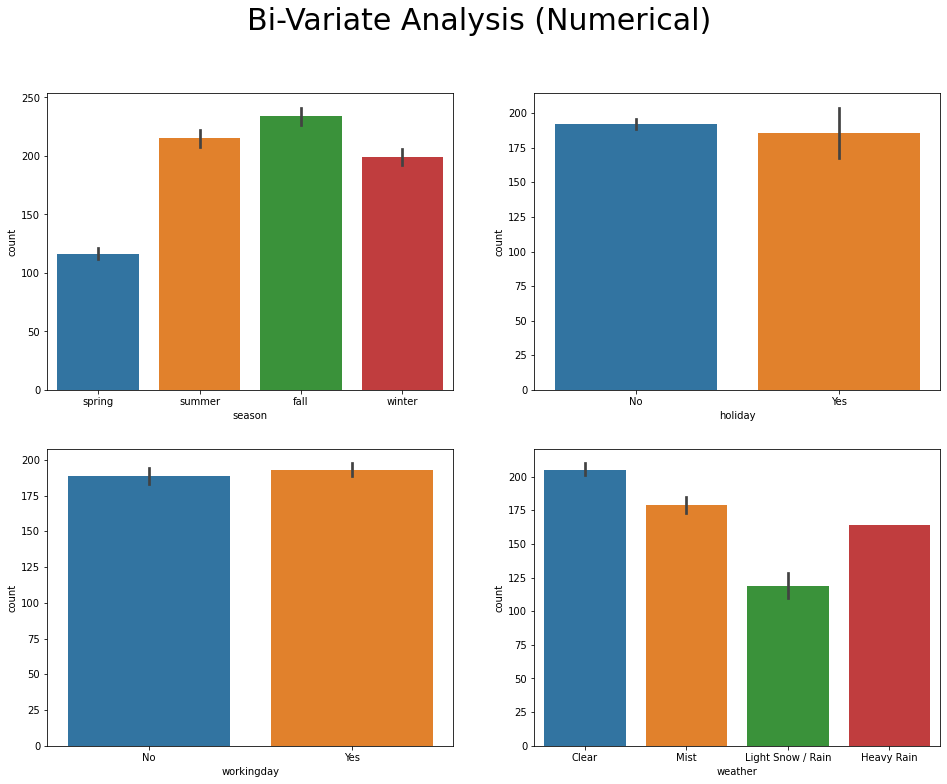

In [22]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
plt.suptitle("Bi-Variate Analysis (Numerical)", fontsize=30)

index = 0
for row in range(2):
    for col in range(2):
        sns.barplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

### Plotting Numerical variables againt count using Scatterplot:

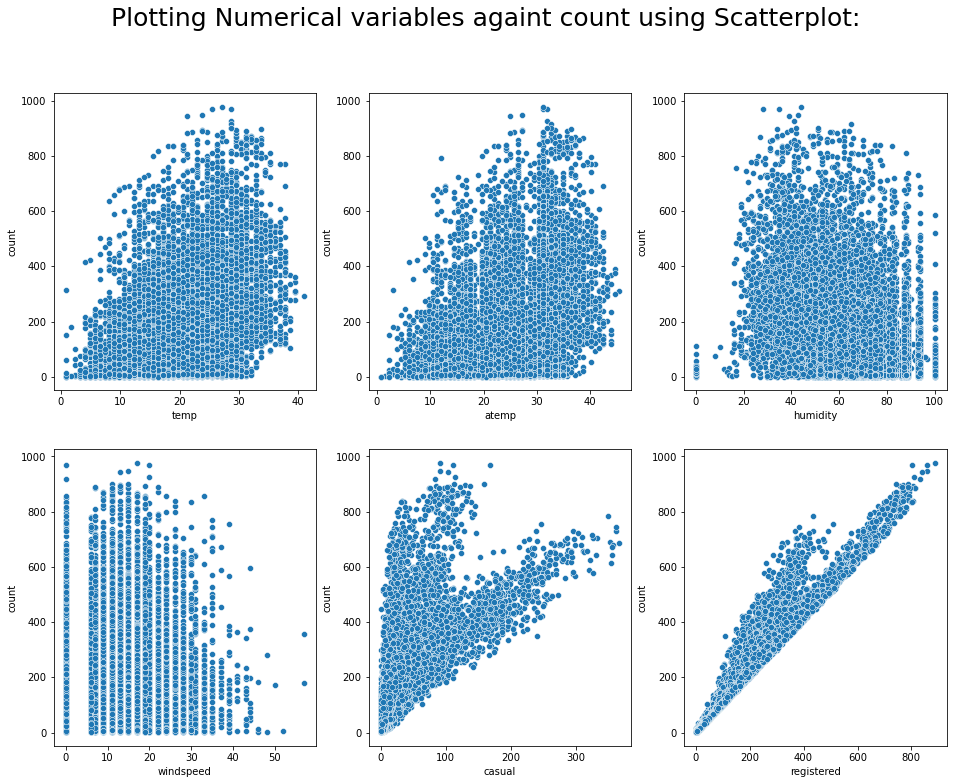

In [23]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
plt.suptitle("Plotting Numerical variables againt count using Scatterplot:", fontsize=25)
index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

In [24]:
df['month']=df['datetime'].dt.month_name()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,spring,No,No,Clear,9.84,14.395,81,0.0,3,13,16,January
1,2011-01-01 01:00:00,spring,No,No,Clear,9.02,13.635,80,0.0,8,32,40,January
2,2011-01-01 02:00:00,spring,No,No,Clear,9.02,13.635,80,0.0,5,27,32,January
3,2011-01-01 03:00:00,spring,No,No,Clear,9.84,14.395,75,0.0,3,10,13,January
4,2011-01-01 04:00:00,spring,No,No,Clear,9.84,14.395,75,0.0,0,1,1,January


In [25]:
df_month=df.groupby(df['month'])['count'].sum().reset_index().sort_values(by='count', ascending=False)
df_month

,month,count
6,June,220733
5,July,214617
1,August,213516
11,September,212529
10,October,207434
8,May,200147
9,November,176440
0,April,167402
2,December,160160
7,March,133501


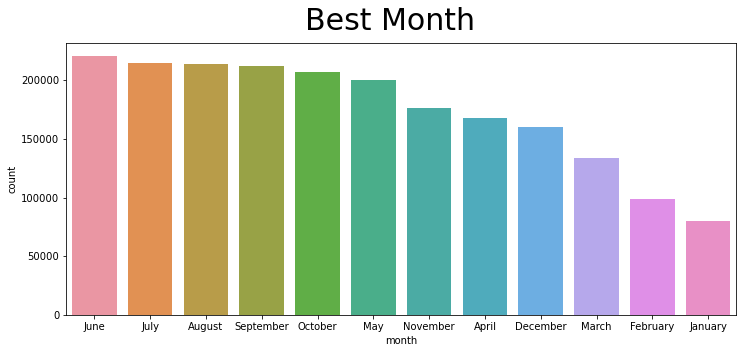

In [26]:
plt.figure(figsize=(12,5)).suptitle('Best Month', fontsize=30)
sns.barplot(data=df_month, x='month', y='count')
plt.show()

## MultiVariate Analysis

In [27]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,spring,No,No,Clear,9.84,14.395,81,0.0,3,13,16,January
1,2011-01-01 01:00:00,spring,No,No,Clear,9.02,13.635,80,0.0,8,32,40,January
2,2011-01-01 02:00:00,spring,No,No,Clear,9.02,13.635,80,0.0,5,27,32,January
3,2011-01-01 03:00:00,spring,No,No,Clear,9.84,14.395,75,0.0,3,10,13,January
4,2011-01-01 04:00:00,spring,No,No,Clear,9.84,14.395,75,0.0,0,1,1,January


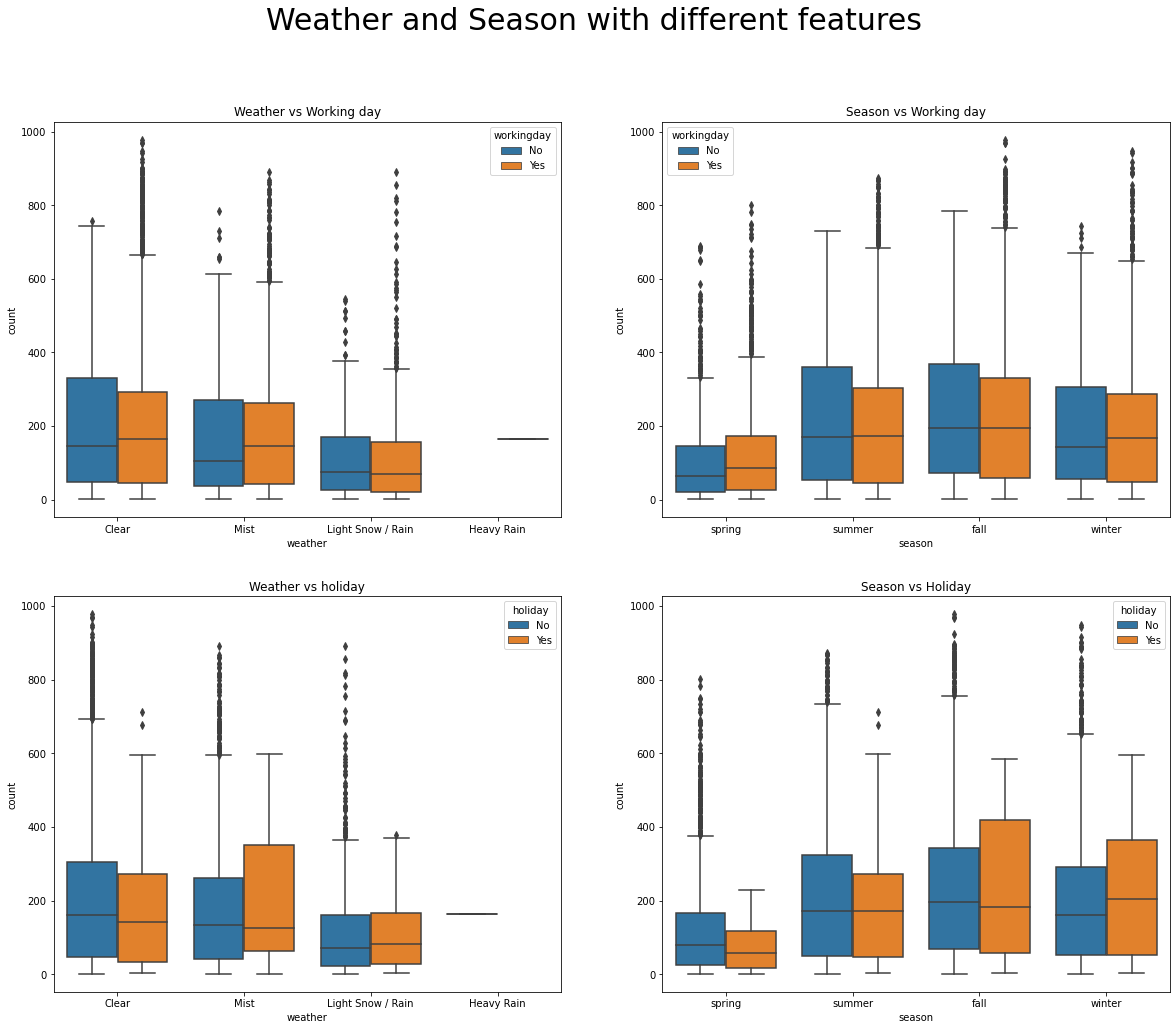

In [28]:
plt.figure(figsize=(20,16)).suptitle("Weather and Season with different features", fontsize=30)

plt.subplot(2,2,1)
sns.boxplot(data=df, x='weather', y='count', hue='workingday')
plt.title("Weather vs Working day")

plt.subplot(2,2,2)
sns.boxplot(data=df, x='season', y='count', hue='workingday')
plt.title("Season vs Working day")

plt.subplot(2,2,3)
sns.boxplot(data=df, x='weather', y='count', hue='holiday')
plt.title("Weather vs holiday")

plt.subplot(2,2,4)
sns.boxplot(data=df, x='season', y='count', hue='holiday')
plt.title("Season vs Holiday")

plt.show()

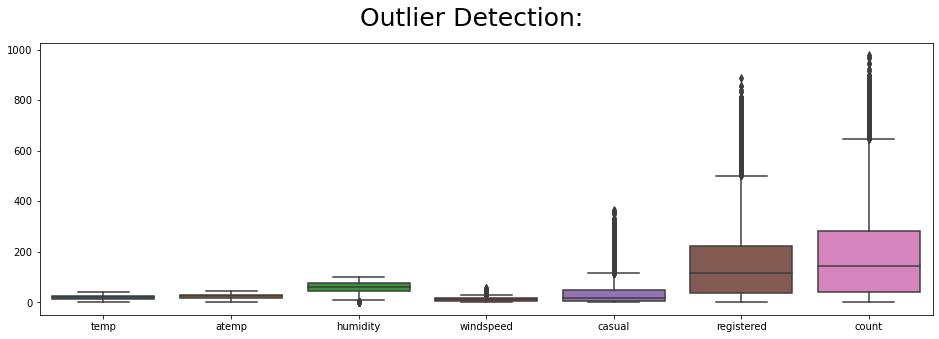

In [29]:
plt.figure(figsize=(16,5))
plt.suptitle("Outlier Detection:",fontsize=25)
sns.boxplot(data=df)
plt.show()

### Plotting boxplots to Detect Outliers in Individual features:

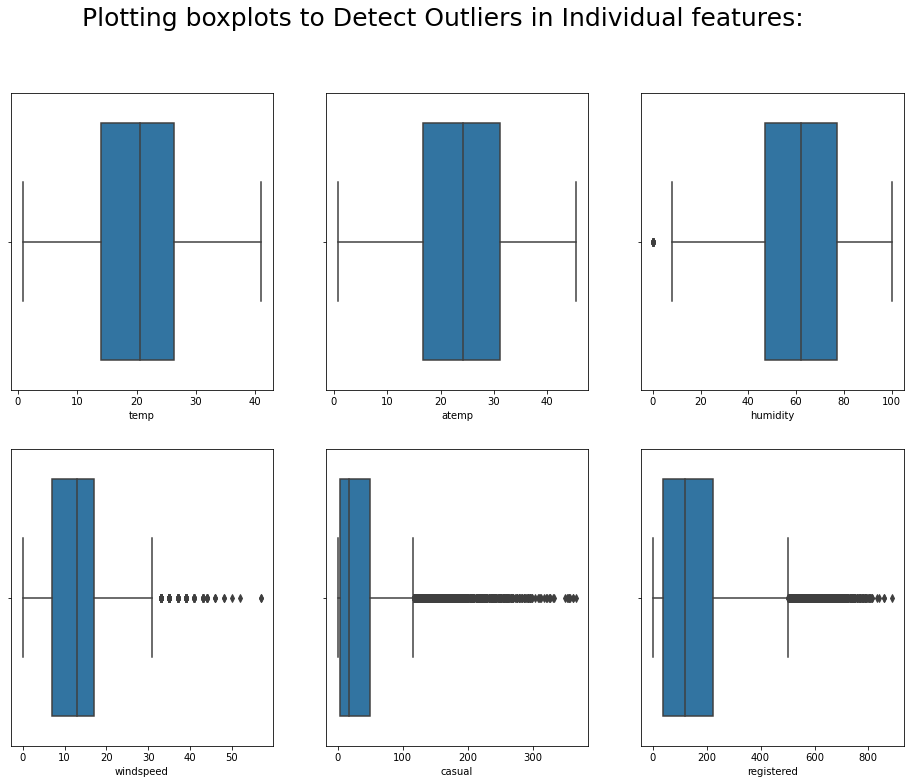

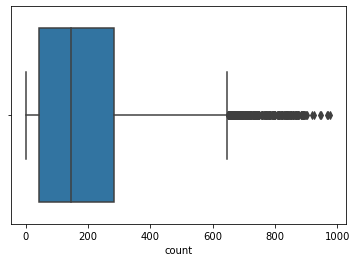

In [30]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
plt.suptitle("Plotting boxplots to Detect Outliers in Individual features:", fontsize=25)
index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1
        
plt.show()
sns.boxplot(x=df[num_cols[-1]]) 
plt.show()

In [31]:
df.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


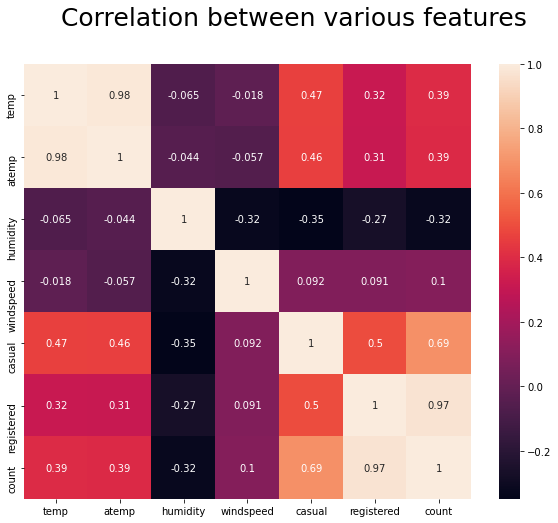

In [32]:
plt.figure(figsize=(10,8)).suptitle("Correlation between various features", fontsize=25)
sns.heatmap(data=df.corr(), annot=True)
plt.show()

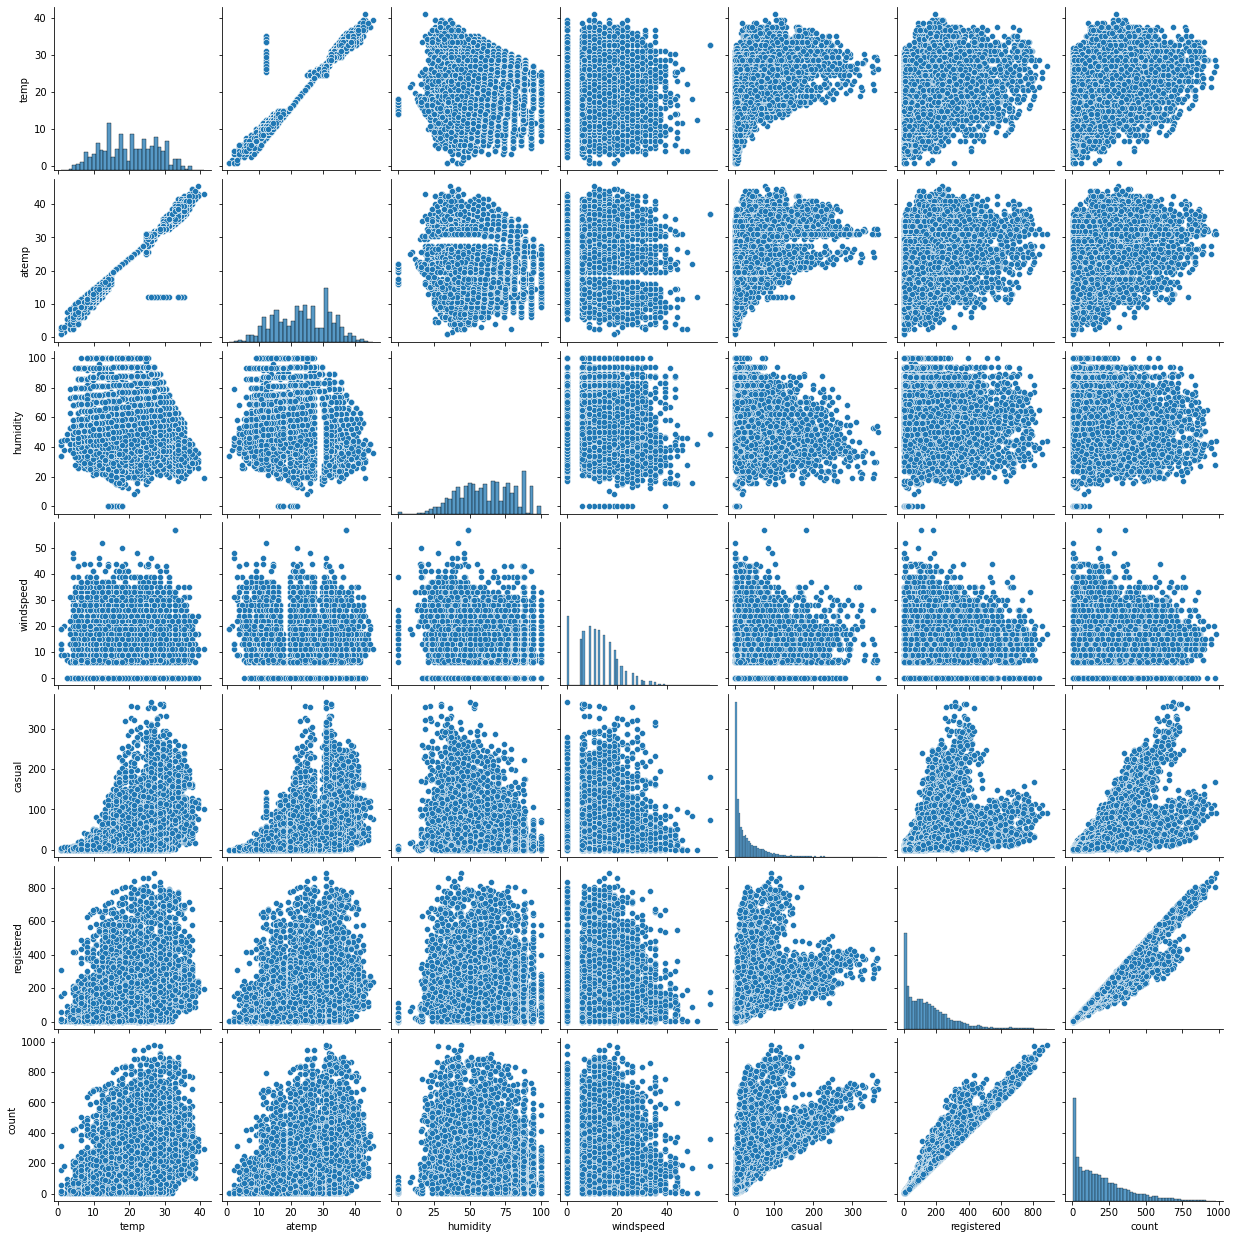

In [33]:
sns.pairplot(df)
plt.show()

# Hypothesis Testing:

## 1. Checking if there any significant difference between the no. of bike rides on Weekdays and Weekends.

-  **Null Hypothesis (H0)**: There is no significant difference between the no. of bike rides on Weekdays and Weekends.
-  **Alternate Hypothesis (H1)**: There is significant difference between the no. of bike rides on Weekdays and Weekends.
-  **Siginficance Level**: 95%


In [34]:
df_working = df[df['workingday']=='No']['count'] 
df_weekend = df[df['workingday']=='Yes']['count']

In [35]:
t_val, p_val=stats.ttest_ind(df_working, df_weekend)

In [36]:
print(f"T-value: {t_val}\nP-value: {p_val}")

T-value: -1.2096277376026694
P-value: 0.22644804226361348


In [37]:
alpha = 0.05

if p_val < alpha:
    print("Reject Null hypothesis: \nThere is significant difference between the no. of bike rides on Weekdays and Weekends.")
else:
    print("Failed to reject Null hypothesis: \nThere is no significant difference between the no. of bike rides on Weekdays and Weekends.")

Failed to reject Null hypothesis: 
There is no significant difference between the no. of bike rides on Weekdays and Weekends.


### 2. Checking if the Weather conditions are significantly different during different Seasons.
-  **Null Hypothesis (H0)**: Weather conditions are not significantly different during different Seasons.
-  **Alternate Hypothesis (H1)**: Weather conditions are significantly different during different Seasons.
-  **Siginficance Level**: 95%

In [38]:
weather_v_season= pd.crosstab(df['weather'], df['season'])
weather_v_season

season,fall,spring,summer,winter
weather,,,,
Clear,1930,1759,1801,1702
Heavy Rain,0,1,0,0
Light Snow / Rain,199,211,224,225
Mist,604,715,708,807


In [39]:
chi2_stat, p_val, dof, arr= stats.chi2_contingency(weather_v_season)

In [40]:
print(f"chi2_stat: {chi2_stat}\nP-value: {p_val}\ndegree of Freedom: {dof}\nArray:\n{arr}")

chi2_stat: 49.15865559689363
P-value: 1.5499250736864862e-07
degree of Freedom: 9
Array:
[[1.80559765e+03 1.77454639e+03 1.80559765e+03 1.80625831e+03]
 [2.51056403e-01 2.46738931e-01 2.51056403e-01 2.51148264e-01]
 [2.15657450e+02 2.11948742e+02 2.15657450e+02 2.15736359e+02]
 [7.11493845e+02 6.99258130e+02 7.11493845e+02 7.11754180e+02]]


In [41]:
alpha = 0.05

if p_val < alpha:
    print("Reject Null hypothesis: \nWeather conditions are significantly different during different Seasons.\nHence Weather and Seasons are independent.")
else:
    print("Failed to reject Null hypothesis: \nWeather conditions are not significantly different during different Seasons.\nHence Weather and Seasons are dependent.")

Reject Null hypothesis: 
Weather conditions are significantly different during different Seasons.
Hence Weather and Seasons are independent.


## 3. Check if the demand of bicycles on rent is the same for different Seasons?

In [42]:
df['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [43]:
df_spring=df[df['season']=='spring']['count']
df_summer=df[df['season']=='summer']['count']
df_fall=df[df['season']=='fall']['count']
df_winter=df[df['season']=='winter']['count']

In [44]:
from statsmodels.graphics.gofplots import qqplot

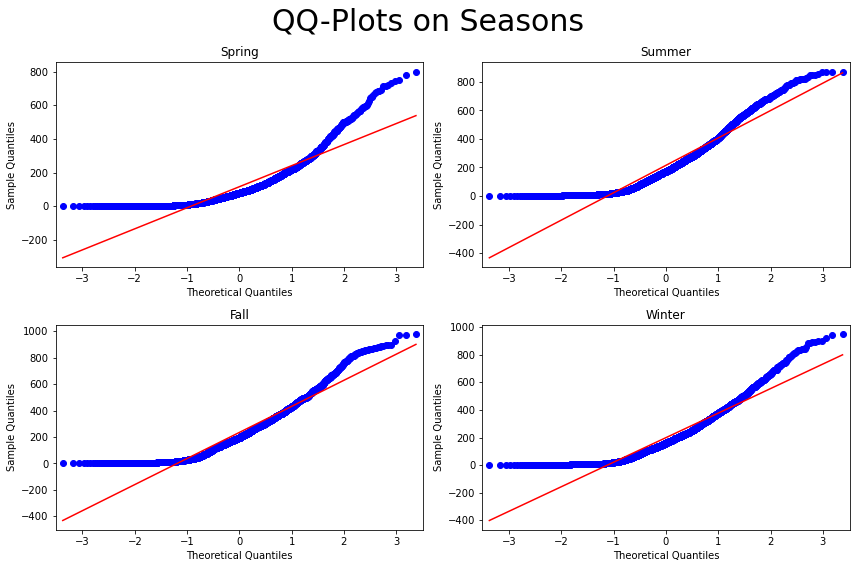

In [45]:
data = {
    'season': ['Spring', 'Summer', 'Fall', 'Winter'],
    'count': [df_spring, df_summer, df_fall, df_winter]
}

df_season = pd.DataFrame(data)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.suptitle("QQ-Plots on Seasons", fontsize=30)

for i, (season, count) in enumerate(zip(df_season['season'], df_season['count'])):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    qqplot(count, line='s', ax=ax)
    ax.set_title(season)

plt.tight_layout()
plt.show()


### Insights from QQ-Plots:

* **Spring & Summer**: Both seasons exhibit deviations from the diagonal line, suggesting non-normal distributions with a right skew. This indicates a likelihood of more days with lower bike rentals compared to higher rentals.

* **Fall & Winter**: While Fall and Winter also display some deviations, the distribution appears relatively closer to normal compared to Spring and Summer. However, definitive conclusions would require a larger sample size.

## As the data is not guassian, ANOVA couldn't be applied.

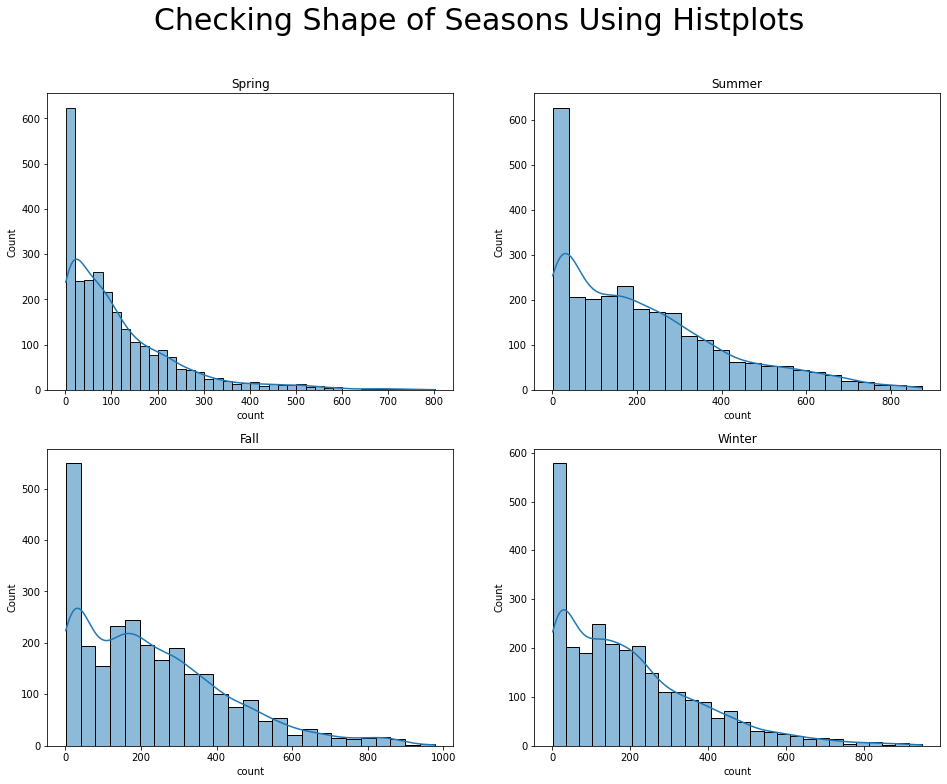

In [46]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
plt.suptitle("Checking Shape of Seasons Using Histplots", fontsize=30)
seasons=[df_spring, df_summer, df_fall, df_winter]
title=['Spring', 'Summer', 'Fall', 'Winter']

index = 0

for row in range(2):
    for col in range(2):
        sns.histplot(data=seasons[index], kde=True, ax=axis[row, col])
        #plt.title(title[index])
        axis[row, col].set_title(title[index])
        index += 1
        
plt.show()

### Above Plot showing that the the data is **Right Skewed**

In [47]:
Levene_stat, p_val= stats.levene(df_spring, df_summer, df_fall, df_winter)

In [48]:
print("Levene Result:")
print(f"Levene statistic: {Levene_stat}\nP-Value: {p_val}")

Levene Result:
Levene statistic: 187.7706624026276
P-Value: 1.0147116860043298e-118


In [49]:
alpha = 0.05

if p_val < alpha:
    print("Reject Null hypothesis: \nVariances are not equal.")
else:
    print("Failed to reject Null hypothesis: \nVariances are equal")

Reject Null hypothesis: 
Variances are not equal.


### Variances are not equal, we have to use a Non-parametric test, here I'm using Kruskal-Wallis Test, which Equivalent to the one-way ANOVA

In [50]:
kruskal_stat, p_val= stats.kruskal(df_spring, df_summer, df_fall, df_winter)

In [51]:
print("kruskal Result:")
print(f"kruskal statistic: {kruskal_stat}\nP-Value: {p_val}")

kruskal Result:
kruskal statistic: 699.6668548181988
P-Value: 2.479008372608633e-151


In [52]:
if p_val < 0.05:
    print("Reject Null hypothesis, the demand of bicycles on rent is not same for different Seasons")
else:
    print("Fail to Reject Null hypothesis, the demand of bicycles on rent is the same for different Seasons")

Reject Null hypothesis, the demand of bicycles on rent is not same for different Seasons


##  4. Check if the demand of bicycles on rent is the same for different Weather conditions?

In [53]:
df['weather'].unique()

array(['Clear', 'Mist', 'Light Snow / Rain', 'Heavy Rain'], dtype=object)

In [54]:
df_clear=df[df['weather']=='Clear']['count']
df_mist=df[df['weather']=='Mist']['count']
df_light_snow=df[df['weather']=='Light Snow / Rain']['count']
df_heavy_rain=df[df['weather']=='Heavy Rain']['count']

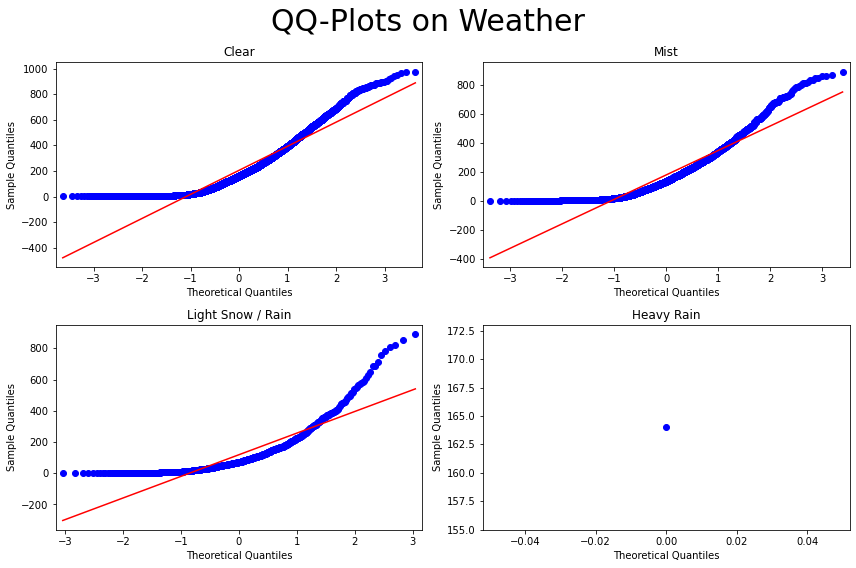

In [55]:
data = {
    'weather': ['Clear', 'Mist', 'Light Snow / Rain', 'Heavy Rain'],
    'count': [df_clear, df_mist, df_light_snow, df_heavy_rain]
}

df_weather = pd.DataFrame(data)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.suptitle("QQ-Plots on Weather", fontsize=30)

for i, (weather, count) in enumerate(zip(df_weather['weather'], df_weather['count'])):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    qqplot(count, line='s', ax=ax)
    ax.set_title(weather)

plt.tight_layout()
plt.show()


### Insights from QQ-Plots:

* **Light Snow/Rain:** Deviations from the diagonal line, especially in the lower quantiles, indicate a left-skewed distribution. This suggests a likelihood of more days with higher amounts of light snow/rain.

* **Heavy Rain:** As the data is less no assumption can be made.

* **Mist:** Deviations, particularly in the upper quantiles, imply a right-skewed distribution, indicating more days with lower amounts of mist.

* **Clear:** Scatter throughout the plot indicates a non-normal distribution. Determining the direction of skew is challenging. 

Overall, these qq-plots suggest that most weather variables likely deviate from normality, with light snow/rain and mist showing significant skewness. Heavy rain might exhibit a distribution closer to normal, though further analysis is warranted.

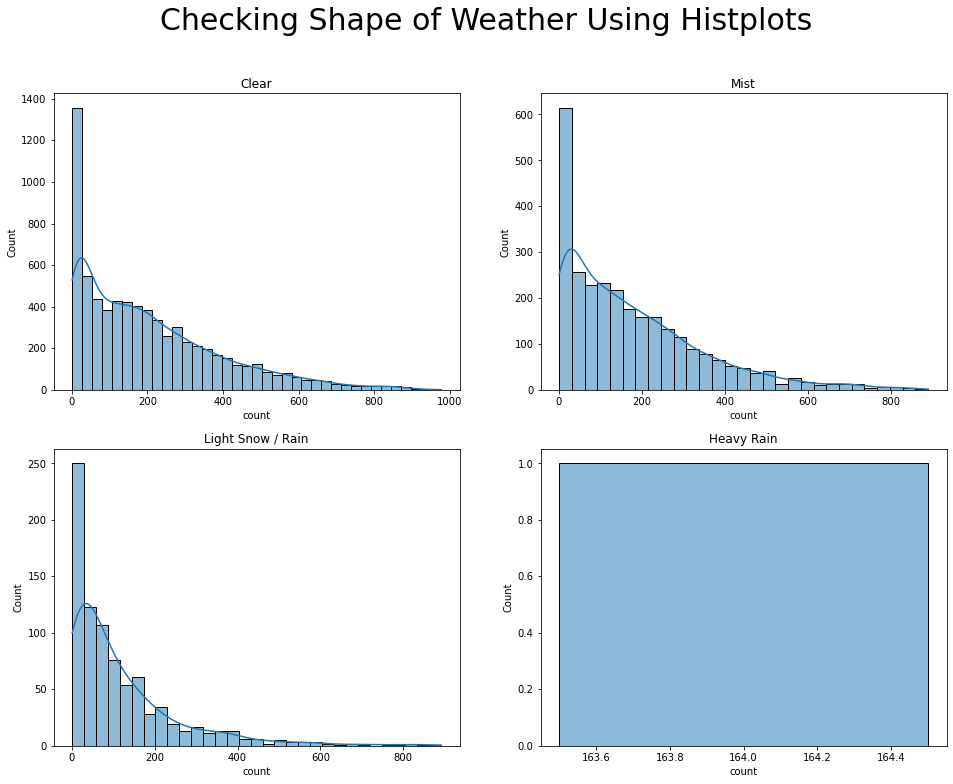

In [56]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
plt.suptitle("Checking Shape of Weather Using Histplots", fontsize=30)
weathers=[df_clear, df_mist, df_light_snow, df_heavy_rain]
title=['Clear', 'Mist', 'Light Snow / Rain', 'Heavy Rain']

index = 0

for row in range(2):
    for col in range(2):
        sns.histplot(data=weathers[index], kde=True, ax=axis[row, col])
        #plt.title(title[index])
        axis[row, col].set_title(title[index])
        index += 1
        
plt.show()

In [57]:
Levene_stat, p_val= stats.levene(df_clear, df_mist, df_light_snow, df_heavy_rain)

In [58]:
print("Levene Result:")
print(f"Levene statistic: {Levene_stat}\nP-Value: {p_val}")

Levene Result:
Levene statistic: 54.85106195954556
P-Value: 3.504937946833238e-35


In [59]:
alpha = 0.05

if p_val < alpha:
    print("Reject Null hypothesis: \nVariances are not equal.")
else:
    print("Failed to reject Null hypothesis: \nVariances are equal")

Reject Null hypothesis: 
Variances are not equal.


In [60]:
kruskal_stat, p_val= stats.kruskal(df_spring, df_summer, df_fall, df_winter)

In [61]:
print("kruskal Result:")
print(f"kruskal statistic: {kruskal_stat}\nP-Value: {p_val}")

kruskal Result:
kruskal statistic: 699.6668548181988
P-Value: 2.479008372608633e-151


In [62]:
if p_val < 0.05:
    print("Reject Null hypothesis, the demand of bicycles on rent is not same for different Seasons")
else:
    print("Fail to Reject Null hypothesis, the demand of bicycles on rent is the same for different Seasons")

Reject Null hypothesis, the demand of bicycles on rent is not same for different Seasons


## Insights:
- During the summer and fall seasons, there is a noticeable increase in bike rentals compared to other seasons.
- Bike rentals tend to rise notably on holidays.
- Analysis of working days suggests that rentals slightly increase on holidays and weekends.
- Inclement weather conditions such as rain, thunderstorms, snow, or fog correlate with reduced bike rentals.
- Instances where humidity levels are below 20 correspond to significantly lower bike rental numbers.
- Lower temperatures, particularly below 10 degrees, coincide with decreased bike rentals.
- High wind speeds, specifically exceeding 35, are associated with lower bike rental demand.

## Recommendations:
- Considering the heightened demand during summer and fall, the company should bolster bike stocks during these seasons.
- With a confidence level of 95%, there appears to be no significant impact of working days on bike rentals.
- During periods of very low humidity, it's advisable to reduce bike inventory available for rental.
- In colder weather conditions, particularly when temperatures drop below 10 degrees, the company should consider reducing bike availability.
- During instances of high wind speeds exceeding 35 or during thunderstorms, it's recommended to limit the number of bikes available for rental.